
## **Tarea #4 : Ecuaciones no Lineales**

### Integrantes:

Dehesa Corona Valeria Carolina (DCVC)

Romero Gordillo Emily (RGE)

###### *Elaborado en Google Colab*


Tome el código visto en el jupyter notebook de Ecuaciones no lineales de los siguientes métodos para encontrar raíces en ecuaciones no lineales. 
* Bisección
* Falsa Posición.
* Secante.
* Newton.

Cada uno de estos métodos devuelve una raíz (considerando las características particulares
de cada uno) ó un mensaje de error en caso de que no se cumplan los criterios de
convergencia.

Modifica los métodos de tal forma que además de devolver la raíz también devuelvan el número de
iteraciones que le tomó a cada uno encontrar la raíz.

**Bibliotecas adicionales:**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#BISECCION
!git clone https://github.com/jugernaut/Numerico2021.git
import os
import numpy as np
import matplotlib.pyplot as plt
import Numerico2021.Utils.gutils as vis
%matplotlib inline

'''Esta funcion implementa el metodo de la biseccion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def biseccion(f,Tol,N,a,b):
    fa, fb = f(a), f(b)
    #no hay un cambio de signo (teorema del valor medio)
    #no existe raiz en el intervalo [a,b]
    if fa*fb>0:
        print ("no hay raiz en [a,b]")
        return
    #contador de iteraciones    
    n=1
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se busca la raiz en el punto medio
        x1=(a+b)/2.0
        fx=f(x1)
        #en caso de que la iteracion siguiente y la diferencia
        #entre la iteracion anterior no excedan Tol, entonces
        #la iteracion actual se aproxima a la solucion buscada
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1 
        if (fx*fa >0.0):      
            a=x1
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1
        print('El numero de iteraciones biseccion es:',n)

fatal: destination path 'Numerico2021' already exists and is not an empty directory.


In [ ]:
# FALSA POSICION
'''Esta funcion implementa el metodo de la falsa posicion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def falsaPosicion(f,Tol,N,a,b):
    fa=f(a)
    fb=f(b)
    #en caso de que no haya cambio de signo, no existe raiz
    if fa*fb>0:
        print("No existe raíz en [a,b]")
        return
    #contador de iteraciones
    n=1
    #se toma una raiz inicial arbitraria   
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se actualiza el rango de busqueda
        fa,fb =f(a),f(b)
        #se calcula la nueva iteracion
        x1= (a*fb-b*fa)/(fb-fa)
        fx=f(x1)
        #en caso de que la diferencia entre la iteracion actual
        #y la iteracion anterior no excedan Tol, y que la raiz
        #evaluada no exceda la tolerancia, se devuelve la raiz
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1 
        if (fx*fa >0.0):      
            a=x1
        #se actualiza x0
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1
        print('El numero de iteraciones falsa posicion es:',n)


In [ ]:
#SECANTE
'''Esta funcion implementa el metodo de la secante
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
x0:  aproximacion inicial
x1: aproximacion siguiente
'''
def secante(f, Tol, N, x0, x1):
    #contador de iteraciones
    n = 1
    #mientras no se haya superado el limite de iteraciones
    while( N >= n ):
        #calculo de los valores de fx
        fx0,fx1=f(x0),f(x1)
        #se calcula la siguiente aproximacion
        xn = x1-fx1*((x1-x0)/float(fx1-fx0))
        #en caso de que se cumplan los criteros de paro
        #se devuelve la raiz
        if (abs(f(xn)) <= Tol and abs(x0-x1) <= Tol):
            return xn
        #se actualizan los valores    
        x0 = x1
        x1 = xn
        #incremento en las iteraciones
        n+=1
        print('El numero de iteraciones secante es:',n)
    raise Exception("Se alcanzo el maximo numero de iteraciones y no se encontro raiz")

In [ ]:
#NEWTON
'''Esta funcion implementa el metodo de Newton
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
df:  derivada de f
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
x0:  aproximacion inicial
'''
def newton(f,df,Tol,N,x0):
    #contador de iteraciones
    n=1
    #mientras no se haya superado el limite de iteraciones
    while n<=N:
        #se evalua la funcion y su derivada
        fx=f(x0)
        dfx=df(x0)
        #se calcula la siguiente aproximacion
        xn = x0-(fx/float(dfx))
        #en caso de cumplir criterios se devuelve la raiz
        if abs(f(xn)) <= Tol and abs(xn-x0) <= Tol:
            return xn
        #actualizamos las aproximaciones
        x0 = xn
        #se incrementa el contador de iteraciones    
        n=n+1
        print('El numero de iteraciones newton es:',n)
    raise Exception("Se alcanzo el maximo numero de iteraciones y no se encontro raiz")


Ya con los métodos modificados en un método llamado main(), encuentra las raíces e
iteraciones de las siguientes funciones empleando cada uno de los métodos de la sección
1.1. Utiliza una Tol=0.000001 y una N=1000, recuerda que si el método no muestra
convergencia se puede deber a varios factores.
* $f (x) = 3 \sin{x} + 2$
* $f (x) = 2 - e^x + log_{10} (x)$
* $f (x) = ln (x + 1) - x + 1$

In [ ]:
import math
import numpy as np 

def main():
  print("Sea f1 = 3sinx + 2")
  def f1(x):
    return (3*math.sin(x))+2
  def df1(x):
    return 3*math.cos(x)   

  def f2(x):
    return 2 - math.exp(x)+ np.log10(x)
  def df2(x):
    return (1/(x*np.log(x))) - math.exp(x)  

  def f3(x):
    return np.log(x+1)-x+1
  def df3(x):
    return (1/(x+1))-1  

  raizBisf1 = biseccion(f1,0.000001,1000,3.0,5.0)
  print("La raíz 1 con el método de la bisección para f1 es:", raizBisf1)
  raiz2Bisf1 = biseccion(f1,0.000001,1000,5.0,6.0)
  print("La raíz 2 con el método de la bisección para f1 es:", raiz2Bisf1)

  raizFPf1 = falsaPosicion(f1,0.000001,1000,3.0,5.0)
  print("La raíz 1 con el método de la falsa posición para f1 es:", raizFPf1)
  raiz2FPf1 = falsaPosicion(f1,0.000001,1000,5.0,6.0)
  print("La raíz 2 con el método de la falsa posición para f1 es:", raiz2FPf1)  

  raizSecf1 = secante(f1,0.000001,1000,3.0,5.0)
  print("La raíz 1 con el método de la secante para f1 es:", raizSecf1)
  raiz2Secf1 = secante(f1,0.000001,1000,5.0,6.0)
  print("La raíz 2 con el método de la secante para f1 es:", raiz2Secf1)

  raizNewf1 = newton(f1,df1,0.000001,1000,4.0)
  print("La raíz 1 con el método de Newton para f1 es:", raizNewf1)
  raiz2Newf1 = newton(f1,df1,0.000001,1000,5.0)
  print("La raíz 2 con el método de Newton para f1 es:", raiz2Newf1)


  raizBisf2 = biseccion(f2,0.000001,1000,0.0,0.3)
  print("La raíz 1 con el método de la bisección para f2 es:", raizBisf2)
  raiz2Bisf2 = biseccion(f2,0.000001,1000,0.3,1.5)
  print("La raíz 2 con el método de la bisección para f2 es:", raiz2Bisf2)

  raizFPf2 = falsaPosicion(f2,0.000001,1000,0.1,0.3)
  print("La raíz 1 con el método de la falsa posición para f2 es:", raizFPf2)
  raiz2FPf2 = falsaPosicion(f2,0.000001,1000,0.3,1.5)
  print("La raíz 2 con el método de la falsa posición para f2 es:", raiz2FPf2)

  raizSecf2 = secante(f2,0.000001,1000,0.1,0.3) 
  print("La raíz 1 con el método de la secante para f2 es:", raizSecf2)
  raiz2Secf2 = secante(f2,0.000001,1000,0.3,1.5)
  print("La raíz 2 con el método de la secante para f2 es:", raiz2Secf2)

  raizNewf2 = newton(f2,df2,0.000001,1000,0.15)
  print("La raíz 1 con el método de Newton para f2 es:", raizNewf2)
  raiz2Newf2 = newton(f2,df2,0.000001,1000,0.5)
  print("La raíz 2 con el método de Newton para f2 es:", raiz2Newf2)

  print("Sea f2 = 2 - e^x +log_10(x)")

  print("Para la raiz 2 se utilizo el mismo intervalo en todos los metodos")
  raizBisf2 = biseccion(f2,0.000001,1000,0.1,0.3)
  print("La raíz 1 con el método de la bisección para f2 es:", raizBisf2)
  raiz2Bisf2 = biseccion(f2,0.000001,1000,0.3,1.5)
  print("La raíz 2 con el método de la bisección para f2 es:", raiz2Bisf2)

  raizFPf2 = falsaPosicion(f2,0.000001,1000,0.1,0.3)
  print("La raíz 1 con el método de la falsa posición para f2 es:", raizFPf2)
  raiz2FPf2 = falsaPosicion(f2,0.000001,1000,0.3,1.5)
  print("La raíz 2 con el método de la falsa posición para f2 es:", raiz2FPf2)

  raizSecf2 = secante(f2,0.000001,1000,0.1,0.3) 
  print("La raíz 1 con el método de la secante para f2 es:", raizSecf2)
  raiz2Secf2 = secante(f2,0.000001,1000,0.3,1.5)
  print("La raíz 2 con el método de la secante para f2 es:", raiz2Secf2)

  raizNewf2 = newton(f2,df2,0.000001,1000,0.15)
  print("La raíz 1 con el método de Newton para f2 es:", raizNewf2)
  raiz2Newf2 = newton(f2,df2,0.000001,1000,0.5)
  print("La raíz 2 con el método de Newton para f2 es:", raiz2Newf2) 


  print("Sea f2 = ln(x+1)-x+1")
  print("Para la raiz 2 se utilizo el mismo intervalo en todos los metodos")
  raizBisf3 = biseccion(f3,0.000001,1000,-0.9,-0.7)
  print("La raíz 1 con el método de la bisección para f3 es:", raizBisf3)
  raiz2Bisf3 = biseccion(f3,0.000001,1000,2,2.5)
  print("La raíz 2 con el método de la bisección para f3 es:", raiz2Bisf3)

  raizFPf3 = falsaPosicion(f3,0.000001,1000,-0.9,-0.7)
  print("La raíz 1 con el método de la falsa posición para f3 es:", raizFPf3)
  raiz2FPf3 = falsaPosicion(f3,0.000001,1000,2,2.5)
  print("La raíz 2 con el método de la falsa posición para f3 es:", raiz2FPf3)

  raizSecf3 = secante(f3,0.000001,1000,-0.9,-0.7)
  print("La raíz 1 con el método de la secante para f3 es:", raizSecf3)
  raiz2Secf3 = secante(f3,0.000001,1000,2,2.5)
  print("La raíz 2 con el método de la secante para f3 es:", raiz2Secf3)

  raizNewf3 = newton(f3,df3,0.000001,1000,-0.8)
  print("La raíz 1 con el método de Newton para f3 es:", raizNewf3)
  raiz2Newf3 = newton(f3,df3,0.000001,1000,2.1)
  print("La raíz 2 con el método de Newton para f3 es:", raiz2Newf3)


print(main())  

Sea f1 = 3sinx + 2
El numero de iteraciones biseccion es: 2
El numero de iteraciones biseccion es: 3
El numero de iteraciones biseccion es: 4
El numero de iteraciones biseccion es: 5
El numero de iteraciones biseccion es: 6
El numero de iteraciones biseccion es: 7
El numero de iteraciones biseccion es: 8
El numero de iteraciones biseccion es: 9
El numero de iteraciones biseccion es: 10
El numero de iteraciones biseccion es: 11
El numero de iteraciones biseccion es: 12
El numero de iteraciones biseccion es: 13
El numero de iteraciones biseccion es: 14
El numero de iteraciones biseccion es: 15
El numero de iteraciones biseccion es: 16
El numero de iteraciones biseccion es: 17
El numero de iteraciones biseccion es: 18
El numero de iteraciones biseccion es: 19
El numero de iteraciones biseccion es: 20
El numero de iteraciones biseccion es: 21
El numero de iteraciones biseccion es: 22
La raíz 1 con el método de la bisección para f1 es: 3.8713202476501465
El numero de iteraciones biseccion e

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


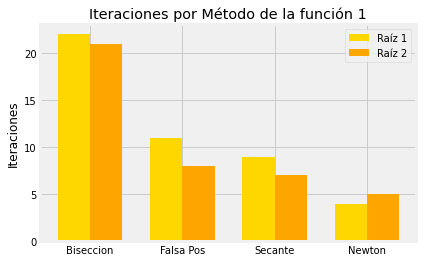

In [ ]:
##Primera Gráfica
labels = ['Biseccion', 'Falsa Pos', 'Secante', 'Newton']
r1_iteraciones = [22, 11, 9, 4]
r2_iteraciones = [21, 8, 7, 5]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r1_iteraciones, width, label='Raíz 1', color = 'gold')
rects2 = ax.bar(x + width/2, r2_iteraciones, width, label='Raíz 2',color = 'orange')


ax.set_ylabel('Iteraciones')
ax.set_title('Iteraciones por Método de la función 1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

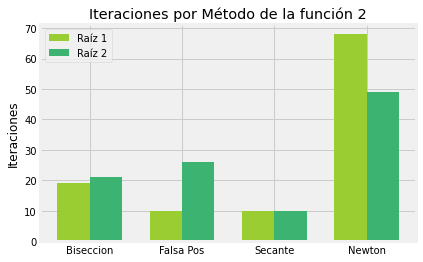

In [ ]:
##Segunda Gráfica
labels = ['Biseccion', 'Falsa Pos', 'Secante', 'Newton']
r1_iteraciones = [19, 10, 10, 68]
r2_iteraciones = [21, 26, 10, 49]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r1_iteraciones, width, label='Raíz 1', color = 'yellowgreen')
rects2 = ax.bar(x + width/2, r2_iteraciones, width, label='Raíz 2', color = 'mediumseagreen')


ax.set_ylabel('Iteraciones')
ax.set_title('Iteraciones por Método de la función 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

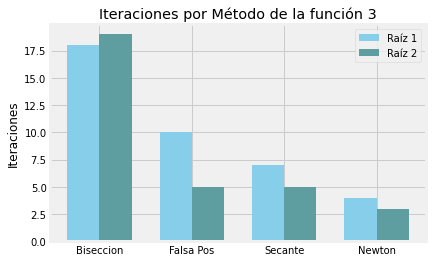

In [ ]:
##Tercera Gráfica
labels = ['Biseccion', 'Falsa Pos', 'Secante', 'Newton']
r1_iteraciones = [18, 10, 7, 4]
r2_iteraciones = [19, 5, 5, 3]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r1_iteraciones, width, label='Raíz 1', color = 'skyblue')
rects2 = ax.bar(x + width/2, r2_iteraciones, width, label='Raíz 2', color = 'cadetblue')


ax.set_ylabel('Iteraciones')
ax.set_title('Iteraciones por Método de la función 3')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()